In [2]:
import pandas as pd
import neattext.functions as nfx
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
import numpy as np


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
import nltk as nlp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


[nltk_data] Downloading package wordnet to C:\Users\Nasibullah
[nltk_data]     Qarizada\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Nasibullah
[nltk_data]     Qarizada\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
data = pd.read_csv('C:/Users/Nasibullah Qarizada/Desktop/dataset.csv')
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.510000e+23,1.510000e+23,2022-04-15 02:24:13 Turkey Standard Time,15.04.2022,02:24:13,300,1.400000e+22,blurbs_s,Bet’s Blurbs,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1.510000e+23,1.510000e+23,2022-04-15 02:19:25 Turkey Standard Time,15.04.2022,02:19:25,300,8.230000e+22,sandyk1971,Sandy King,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'DaphneSheaves', 'name': 'Dap...",NaN,NaN,NaN,NaN
2,1.510000e+23,1.510000e+23,2022-04-15 02:19:10 Turkey Standard Time,15.04.2022,02:19:10,300,1.460000e+23,weikelsherry,Sherry Weikel Weikels,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': '0ld_School_', 'name': 'Anti-...",NaN,NaN,NaN,NaN
3,1.510000e+23,1.510000e+23,2022-04-15 02:18:31 Turkey Standard Time,15.04.2022,02:18:31,300,1.050000e+23,thebias_news,THE BIAS,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1.510000e+23,1.510000e+23,2022-04-15 02:17:38 Turkey Standard Time,15.04.2022,02:17:38,300,4.004777e+09,thewritediva,Shaneequa Cannon,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'D_Bone', 'name': 'D.Dave the...",NaN,NaN,NaN,NaN


In [5]:
data.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              10005
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url          10005
video                  0
thumbnail          10005
near               10005
geo                10005
source             10005
user_rt_id         10005
user_rt            10005
retweet_id         10005
reply_to               0
retweet_date       10005
translate          10005
trans_src          10005
trans_dest         10005
dtype: int64

In [6]:
data.drop('id', axis=1, inplace=True)
data.drop('conversation_id', axis=1, inplace=True)
data.drop('user_id', axis=1, inplace=True)
data.drop('username', axis=1, inplace=True)
data.drop('urls', axis=1, inplace=True)
data.drop('photos', axis=1, inplace=True)

data.drop('timezone', axis=1, inplace=True)
data.drop('name', axis=1, inplace=True)
data.drop('place', axis=1, inplace=True)
data.drop('geo', axis=1, inplace=True)
data.drop('source', axis=1, inplace=True)
data.drop('user_rt_id', axis=1, inplace=True)

data.drop('user_rt', axis=1, inplace=True)
data.drop('date', axis=1, inplace=True)
data.drop('created_at', axis=1, inplace=True)
data.drop('hashtags', axis=1, inplace=True)
data.drop('cashtags', axis=1, inplace=True)
data.drop('retweet', axis=1, inplace=True)

data.drop('time', axis=1, inplace=True)
data.drop('language', axis=1, inplace=True)
data.drop('mentions', axis=1, inplace=True)
data.drop('video', axis=1, inplace=True)
data.drop('near', axis=1, inplace=True)
data.drop('reply_to', axis=1, inplace=True)

data.drop('replies_count', axis=1, inplace=True)
data.drop('retweets_count', axis=1, inplace=True)
data.drop('likes_count', axis=1, inplace=True)
data.drop('link', axis=1, inplace=True)
data.drop('quote_url', axis=1, inplace=True)
data.drop('thumbnail', axis=1, inplace=True)

data.drop('retweet_id', axis=1, inplace=True)
data.drop('retweet_date', axis=1, inplace=True)
data.drop('translate', axis=1, inplace=True)
data.drop('trans_src', axis=1, inplace=True)
data.drop('trans_dest', axis=1, inplace=True)

In [7]:
data.dtypes

tweet    object
dtype: object

In [8]:
data['clean_tweet'] = data['tweet'].apply(nfx.remove_hashtags)
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_urls)
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_puncts)
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_multiple_spaces)
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_stopwords)
data[['tweet', 'clean_tweet']]

,tweet,clean_tweet
0,Maybe people would take Covid more seriously i...,Maybe people Covid seriously physically eviden...
1,@DaphneSheaves Funny . Not me . Just back aft...,Funny brief spell covid day office able home I...
2,@0ld_School_ @komonews Well what the F did you...,F covid Brain washed koolaid drinking TS
3,Los Angeles Times: California lawmaker scraps ...,Los Angeles Times: California lawmaker scraps ...
4,@D_Bone Believe it’s airborne. And often these...,Believe it’s airborne “I went nowhere” people ...
...,...,...
10000,@shplinters @EssexPR A study done by Johns Hop...,study Johns Hopkins university found lockdowns...
10001,@PplsCityCouncil @avitale @kennethmejiaLA @Fil...,allocation monies Covid relief directed deterr...
10002,@humanutella I'm really relieved that I'm no l...,Im relieved Im longer teaching Schools covid p...
10003,@tara_taylor @AnnaHalifax So many of my cowork...,coworkers school got covid Dec amp Dec felt ok...


In [9]:
data['clean_tweet'].iloc[3]

'Los Angeles Times: California lawmaker scraps plan require COVID19 vaccinations school children'

In [10]:
# Cleaning Text: Punctuations
data['tokenized'] = data['clean_tweet'].apply(lambda x: x.split())

In [11]:
data['tokenized'].iloc[3]

['Los',
 'Angeles',
 'Times:',
 'California',
 'lawmaker',
 'scraps',
 'plan',
 'require',
 'COVID19',
 'vaccinations',
 'school',
 'children']

In [12]:


def get_sentiment(tweet):
    blob = TextBlob(tweet)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [13]:
ex1 = data['clean_tweet'].iloc[100]

In [14]:
get_sentiment(ex1)

{'polarity': 0.1, 'subjectivity': 0.9, 'sentiment': 'Positive'}

In [15]:
data['sentiment_results'] = data['clean_tweet'].apply(get_sentiment)

In [16]:
data['sentiment_results']

0        {'polarity': 0.1, 'subjectivity': 0.325, 'sent...
1        {'polarity': 0.10833333333333334, 'subjectivit...
2        {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3        {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
4        {'polarity': 0.25757575757575757, 'subjectivit...
                               ...                        
10000    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
10001    {'polarity': 0.1, 'subjectivity': 0.35, 'senti...
10002    {'polarity': 0.16666666666666666, 'subjectivit...
10003    {'polarity': 0.19999999999999998, 'subjectivit...
10004    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 10005, dtype: object

In [17]:
pd.json_normalize(data['sentiment_results'].iloc[100])

,polarity,subjectivity,sentiment
0,0.1,0.9,Positive


In [18]:
data = data.join(pd.json_normalize(data['sentiment_results']))
data.head()

,tweet,clean_tweet,tokenized,sentiment_results,polarity,subjectivity,sentiment
0,Maybe people would take Covid more seriously i...,Maybe people Covid seriously physically eviden...,"[Maybe, people, Covid, seriously, physically, ...","{'polarity': 0.1, 'subjectivity': 0.325, 'sent...",0.100000,0.325000,Positive
1,@DaphneSheaves Funny . Not me . Just back aft...,Funny brief spell covid day office able home I...,"[Funny, brief, spell, covid, day, office, able...","{'polarity': 0.10833333333333334, 'subjectivit...",0.108333,0.543056,Positive
2,@0ld_School_ @komonews Well what the F did you...,F covid Brain washed koolaid drinking TS,"[F, covid, Brain, washed, koolaid, drinking, TS]","{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
3,Los Angeles Times: California lawmaker scraps ...,Los Angeles Times: California lawmaker scraps ...,"[Los, Angeles, Times:, California, lawmaker, s...","{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
4,@D_Bone Believe it’s airborne. And often these...,Believe it’s airborne “I went nowhere” people ...,"[Believe, it’s, airborne, “I, went, nowhere”, ...","{'polarity': 0.25757575757575757, 'subjectivit...",0.257576,0.629630,Positive


In [19]:
data['sentiment'].value_counts()

Positive    4439
Negative    3480
Neutral     2086
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

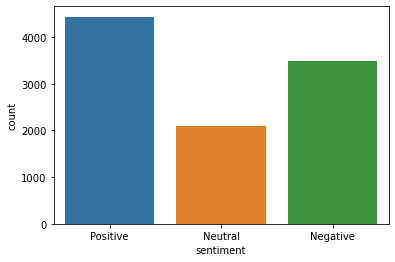

In [20]:

sns.countplot(data['sentiment'])

In [21]:
positive_tweet = data[data['sentiment'] == 'Positive']['clean_tweet']
neutral_tweet = data[data['sentiment'] == 'Neutral']['clean_tweet']
negative_tweet = data[data['sentiment'] == 'Negative']['clean_tweet']
positive_tweet

0        Maybe people Covid seriously physically eviden...
1        Funny brief spell covid day office able home I...
4        Believe it’s airborne “I went nowhere” people ...
8        “So know called tell COVID conservative parent...
9        13 year old autism vaccinated masked time 40 m...
                               ...                        
9994     kid school couple days unwell hands usually in...
9998     🙏Thanks sharing 20 yo son chest pain school re...
10001    allocation monies Covid relief directed deterr...
10002    Im relieved Im longer teaching Schools covid p...
10003    coworkers school got covid Dec amp Dec felt ok...
Name: clean_tweet, Length: 4439, dtype: object

In [22]:
pos_tokens = [token for line in positive_tweet  for token in line.split()]
neg_tokens = [token for line in negative_tweet  for token in line.split()]
neut_tokens = [token for line in neutral_tweet  for token in line.split()]

In [23]:
from collections import Counter
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result
get_tokens(pos_tokens)

{'school': 3256,
 'covid': 1720,
 'Covid': 1680,
 'schools': 1542,
 'COVID': 1028,
 'kids': 959,
 'amp': 616,
 'masks': 444,
 'mask': 439,
 'high': 437,
 'people': 430,
 'like': 392,
 'children': 389,
 'got': 361,
 'home': 346,
 'year': 321,
 'work': 312,
 'positive': 309,
 'know': 303,
 '2': 301,
 'cases': 291,
 'time': 280,
 'right': 280,
 'students': 269,
 'public': 268,
 'years': 265,
 'teachers': 259,
 'parents': 257,
 'week': 241,
 'going': 238}

In [24]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

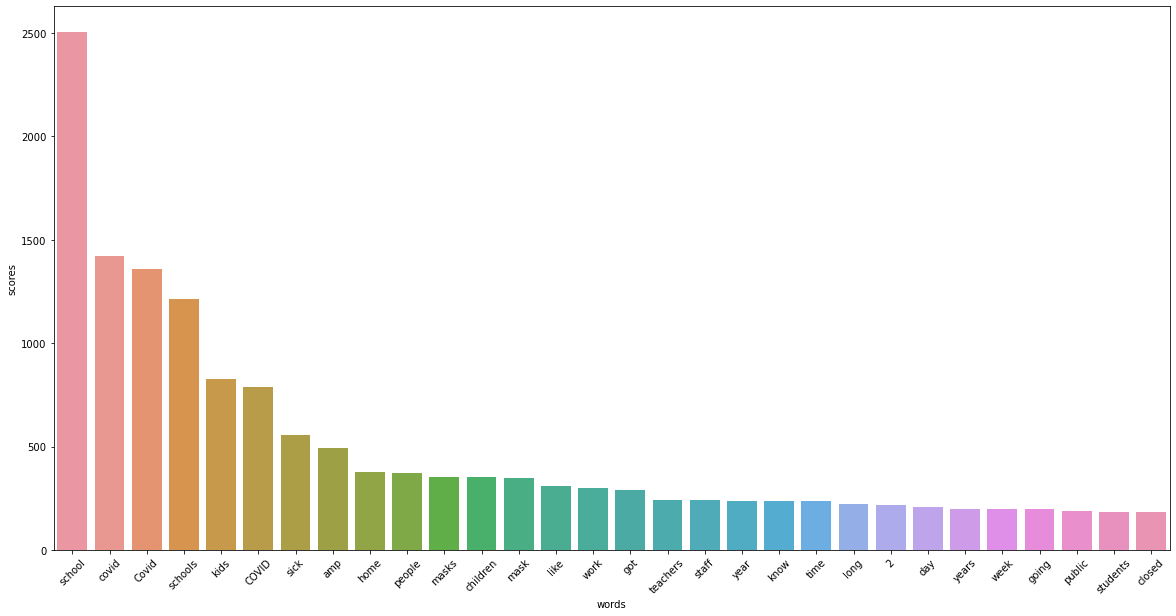

In [25]:
import matplotlib.pyplot as plt

pos_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()

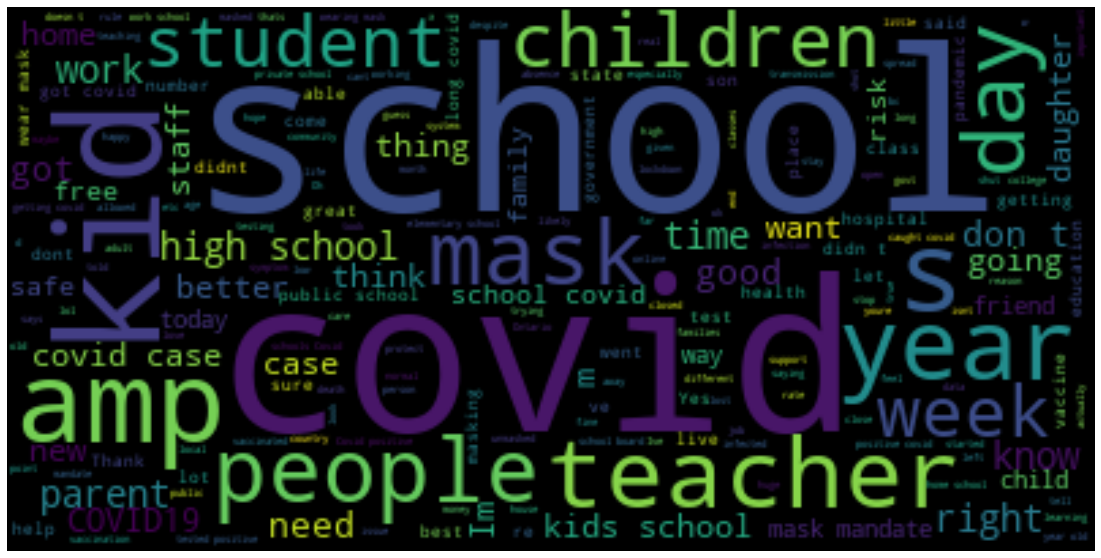

In [26]:
from wordcloud import WordCloud
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neut_tokens)
plot_wordcloud(pos_docx)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10005 entries, 0 to 10004
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet              10005 non-null  object 
 1   clean_tweet        10005 non-null  object 
 2   tokenized          10005 non-null  object 
 3   sentiment_results  10005 non-null  object 
 4   polarity           10005 non-null  float64
 5   subjectivity       10005 non-null  float64
 6   sentiment          10005 non-null  object 
dtypes: float64(2), object(5)
memory usage: 547.3+ KB


In [28]:
tweet_df = data[['clean_tweet','sentiment']]

print(tweet_df.shape)
tweet_df.head(5)

(10005, 2)


,clean_tweet,sentiment
0,Maybe people Covid seriously physically eviden...,Positive
1,Funny brief spell covid day office able home I...,Positive
2,F covid Brain washed koolaid drinking TS,Neutral
3,Los Angeles Times: California lawmaker scraps ...,Neutral
4,Believe it’s airborne “I went nowhere” people ...,Positive


In [29]:
tweet_df["sentiment"].value_counts()

Positive    4439
Negative    3480
Neutral     2086
Name: sentiment, dtype: int64

In [30]:
sentiment_label = tweet_df.sentiment.factorize()
sentiment_label

(array([0, 0, 1, ..., 0, 0, 1], dtype=int64),
 Index(['Positive', 'Neutral', 'Negative'], dtype='object'))

In [31]:
tweet = tweet_df.clean_tweet.values

In [32]:
tweet_df.isnull().sum()

clean_tweet    0
sentiment      0
dtype: int64

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tweet = tweet_df.clean_tweet.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [34]:
print(tweet[0])
print(encoded_docs[0])

Maybe people Covid seriously physically evident chickenpox measles contagious can’t walk chickenpox infecting work school long Covid thing
[135, 7, 1, 537, 1968, 3115, 3902, 1503, 1299, 105, 846, 3902, 1343, 13, 2, 33, 1, 95]


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32

modelCNN=tf.keras.Sequential([
    L.Embedding(vocab_size, embedding_vector_length, input_length=200),
    L.Conv1D(512,activation='relu',kernel_size=5,padding='Same'),
    L.MaxPool1D(),
    L.Conv1D(512,activation='relu',kernel_size=3,padding='Same'),
    L.MaxPool1D(),
    L.Dropout(0.4),
    L.GlobalAveragePooling1D(),
    L.Dense(64,activation='relu'),
    L.Dropout(0.4),
    L.Dense(3,activation='softmax')
])
modelCNN.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer='adam',metrics=['accuracy'])
modelCNN.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           657152    
                                                                 
 conv1d (Conv1D)             (None, 200, 512)          82432     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 100, 512)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 512)          786944    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 50, 512)          0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 50, 512)           0

In [37]:
history1 = modelCNN.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
251/251 [==============================] - 35s 139ms/step - loss: 0.9571 - accuracy: 0.5006 - val_loss: 0.7916 - val_accuracy: 0.6297
Epoch 2/5
251/251 [==============================] - 34s 134ms/step - loss: 0.6753 - accuracy: 0.7119 - val_loss: 0.6305 - val_accuracy: 0.7441
Epoch 3/5
251/251 [==============================] - 35s 138ms/step - loss: 0.3641 - accuracy: 0.8798 - val_loss: 0.4917 - val_accuracy: 0.8261
Epoch 4/5
251/251 [==============================] - 35s 139ms/step - loss: 0.1870 - accuracy: 0.9477 - val_loss: 0.5491 - val_accuracy: 0.8341
Epoch 5/5
251/251 [==============================] - 35s 138ms/step - loss: 0.1225 - accuracy: 0.9676 - val_loss: 0.7784 - val_accuracy: 0.8111


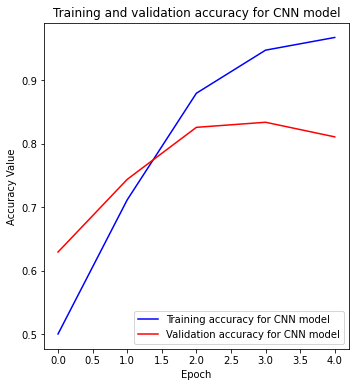

In [43]:
import matplotlib.pyplot as plt

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

plt.figure(figsize=(12,6))
plt.subplot (1, 2, 1)
plt.plot(acc, 'b', label='Training accuracy for CNN model')
plt.plot(val_acc, 'r', label='Validation accuracy for CNN model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.title('Training and validation accuracy for CNN model')
plt.legend()

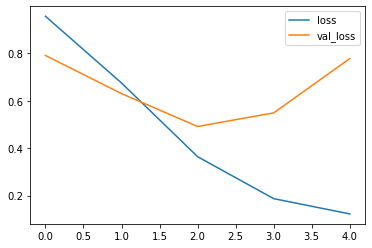

In [45]:
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [46]:
modelRNN=tf.keras.Sequential([
    L.Embedding(vocab_size, embedding_vector_length, input_length=200),
    L.SimpleRNN(512,return_sequences=True,activation='relu'),
    L.SimpleRNN(512,return_sequences=True,activation='relu'),
    L.GlobalAveragePooling1D(),
    L.Dense(64,activation='relu'),
    L.Dropout(0.4),
    L.Dense(3,activation='softmax')
])
modelRNN.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer='adam',metrics=['accuracy'])
modelRNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 32)           657152    
                                                                 
 simple_rnn (SimpleRNN)      (None, 200, 512)          279040    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 200, 512)          524800    
                                                                 
 global_average_pooling1d_2   (None, 512)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 64)                32832     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                      

In [47]:
history2 = modelRNN.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
209/251 [=======================>......] - ETA: 28s - loss: 91738773389312.0000 - accuracy: 0.4375

KeyboardInterrupt: 

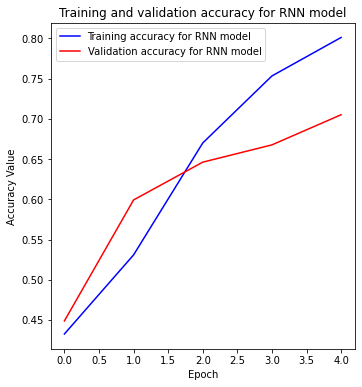

In [ ]:
import matplotlib.pyplot as plt

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.figure(figsize=(12,6))
plt.subplot (1, 2, 1)
plt.plot(acc, 'b', label='Training accuracy for RNN model')
plt.plot(val_acc, 'r', label='Validation accuracy for RNN model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.title('Training and validation accuracy for RNN model')
plt.legend()

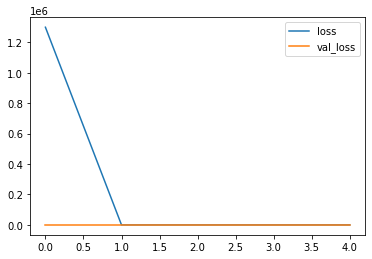

In [ ]:
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.legend()
plt.show()